In [9]:
!unzip Dataset.csv.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Archive:  Dataset.csv.zip
  inflating: Dataset.csv             


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [11]:
df = pd.read_csv('Dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-37-d406db3412e6>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-d406db3412e6>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-d4

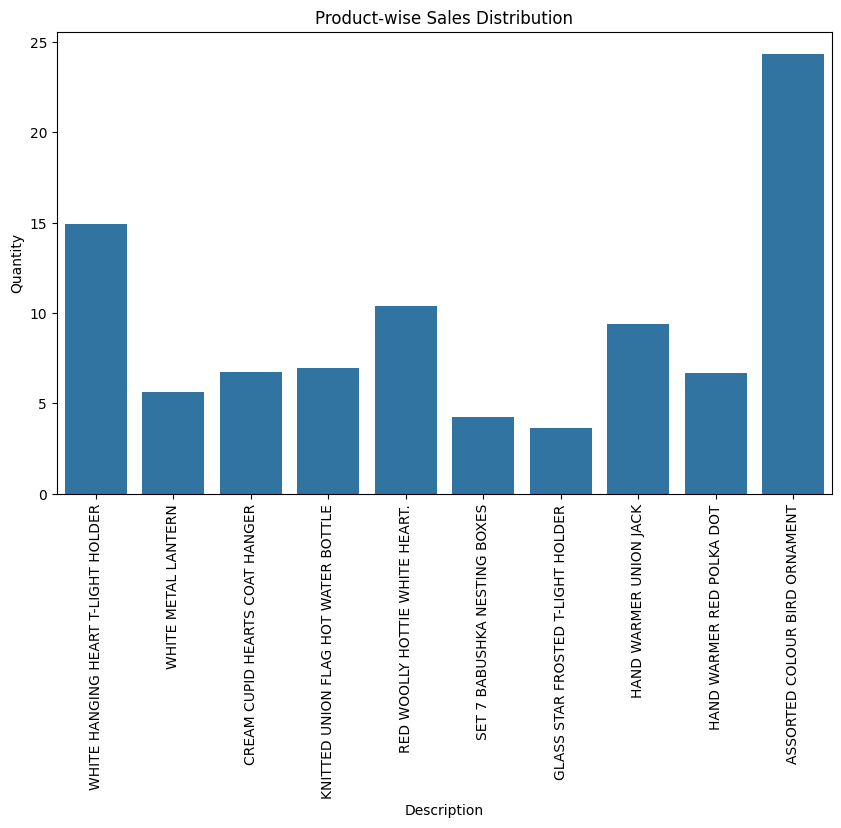

In [37]:
df = pd.read_csv('Dataset.csv')


selected_products = [
    'WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER',
    'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES',
    'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT',
    'ASSORTED COLOUR BIRD ORNAMENT'
]

selected_regions = ['United Kingdom', 'Germany', 'France', 'Netherlands', 'EIRE']


df = df[df['Description'].isin(selected_products) & df['Country'].isin(selected_regions)]


df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
df['TotalRevenue'] = df['TotalRevenue'].apply(lambda x: np.nan if x < 0 else x)

plt.figure(figsize=(10, 6))
sns.barplot(x='Description', y='Quantity', data=df, ci=None)
plt.title('Product-wise Sales Distribution')
plt.xticks(rotation=90)
plt.show()


**Observation :- Assorted COlour BIRD ORNAMENT has highest quantity sold**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



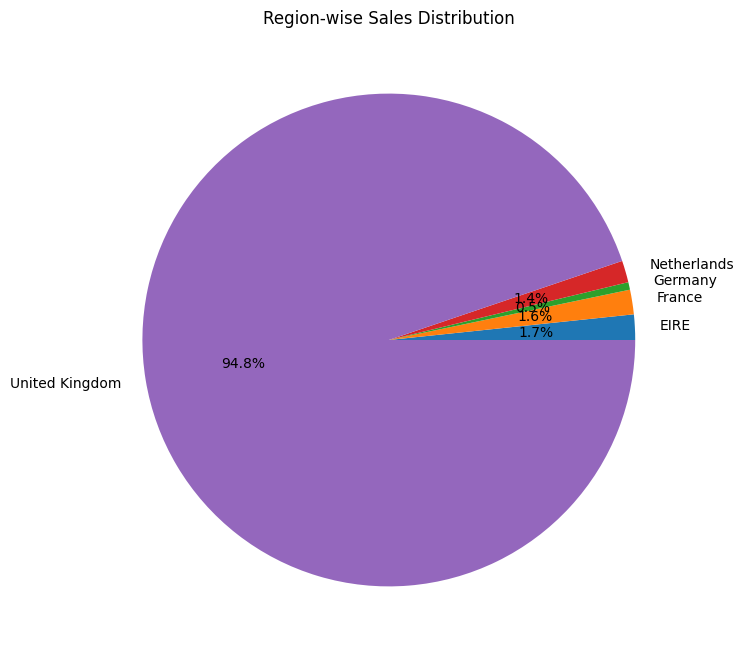

In [38]:
# 2. Pie Chart: Region-wise Sales Distribution
region_sales = df.groupby('Country')['Quantity'].sum()
plt.figure(figsize=(8, 8))
region_sales.plot.pie(autopct='%1.1f%%')
plt.title('Region-wise Sales Distribution')
plt.ylabel('')
plt.show()

**Obseravation :- United States has highest sales**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



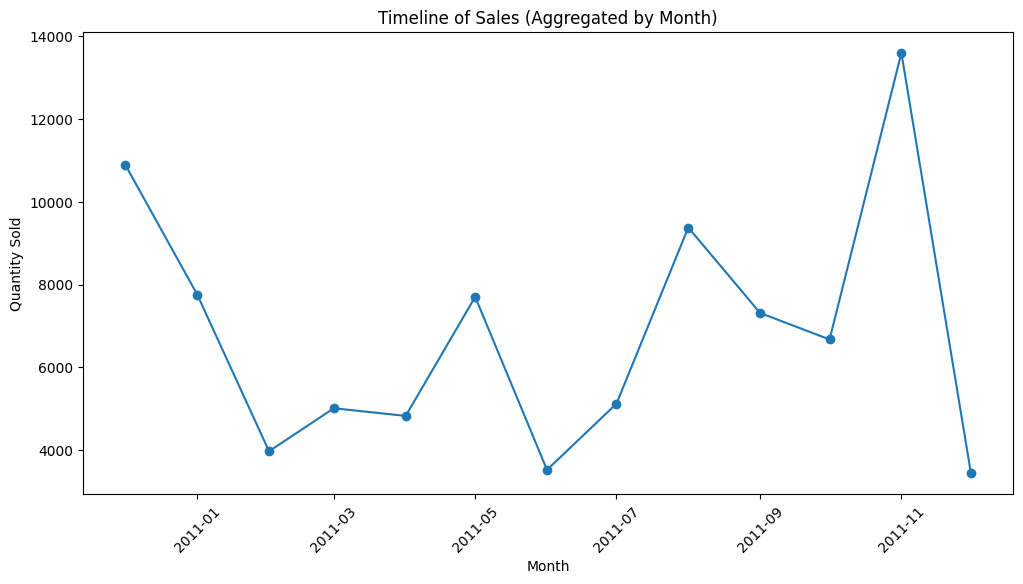

In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for Year-Month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group the data by Year-Month and sum the quantities
timeline_data = df.groupby('YearMonth')['Quantity'].sum().reset_index()

# Convert 'YearMonth' back to a datetime format for plotting
timeline_data['YearMonth'] = timeline_data['YearMonth'].dt.to_timestamp()

# Plotting the timeline chart
plt.figure(figsize=(12, 6))
plt.plot(timeline_data['YearMonth'], timeline_data['Quantity'], marker='o')
plt.title('Timeline of Sales (Aggregated by Month)')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

**Observation :- In 11 month highest sales happened**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



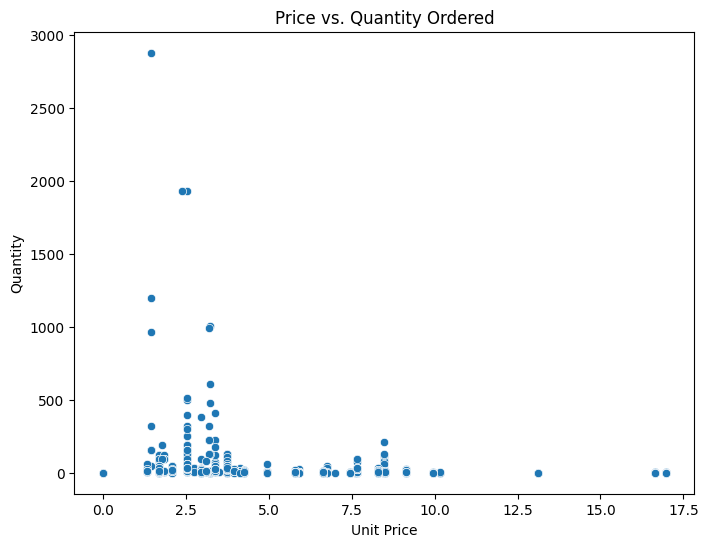

In [43]:
# 5. Scatter Plot: Price vs. Quantity Ordered
df = df[df['Quantity'] >= 0]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('Price vs. Quantity Ordered')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

**Observation :- Cheap Products has highest Sales**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



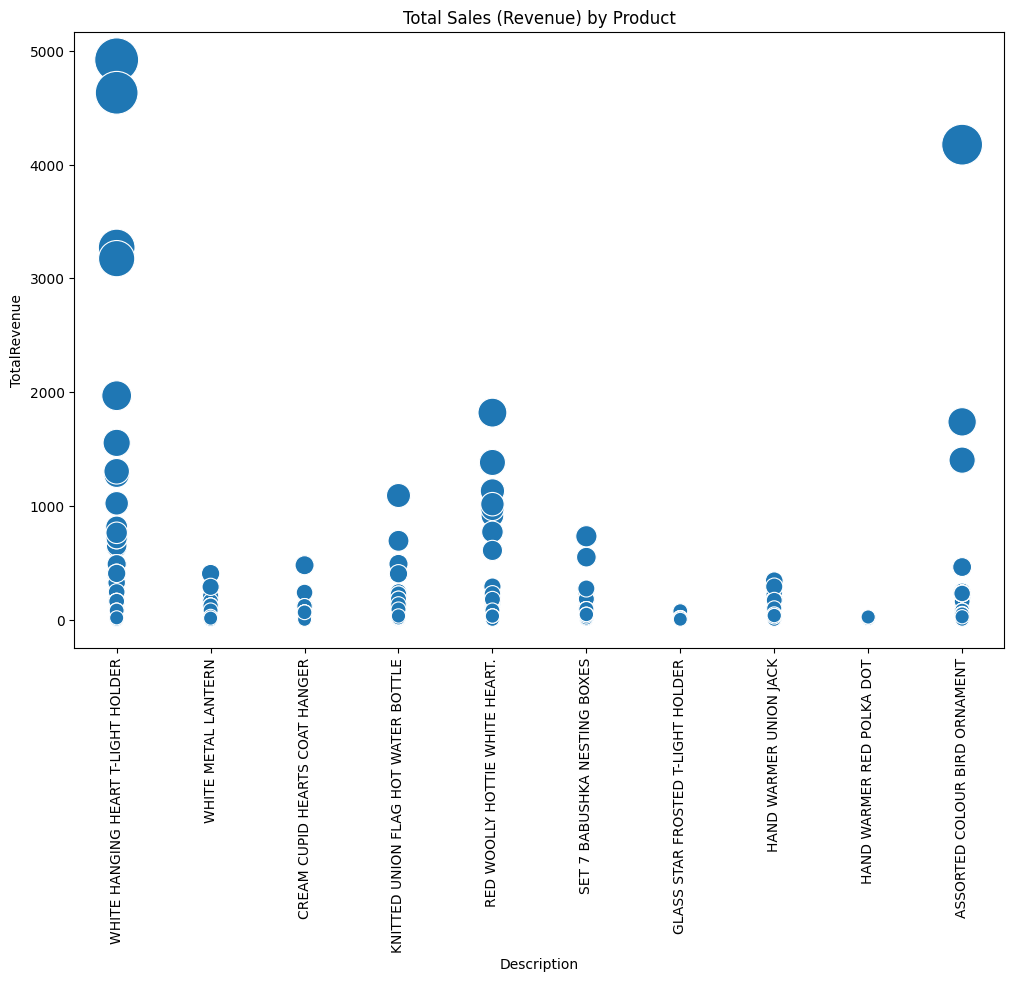

In [44]:
# 6. Bubble Plot: Total Sales (Revenue) by Product
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Description', y='TotalRevenue', size='TotalRevenue', data=df, legend=False, sizes=(100, 1000))
plt.title('Total Sales (Revenue) by Product')
plt.xticks(rotation=90)
plt.show()

**White Hanging Heart T-LIGHT Holder has generated highest Revenus**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



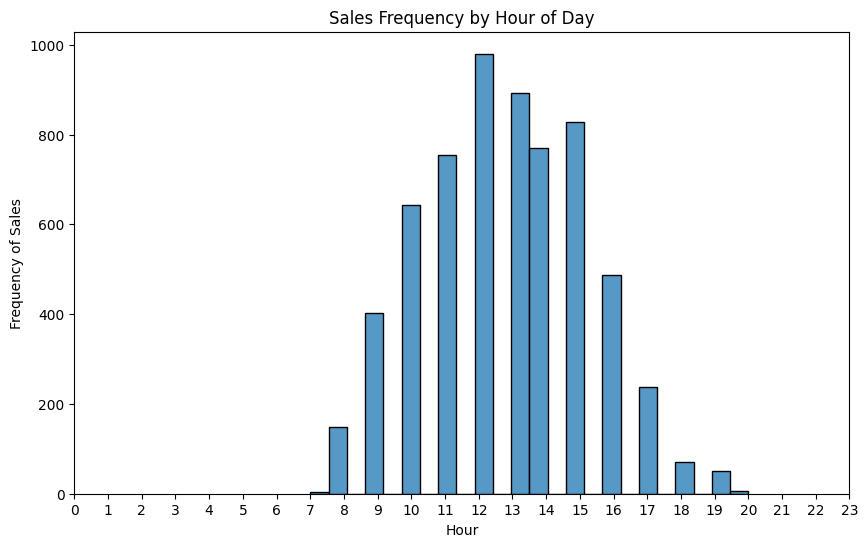

In [48]:
# Assuming df is already loaded and InvoiceDate is converted to datetime
df['Hour'] = df['InvoiceDate'].dt.hour

# Plotting the histogram for sales by the hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=False)  # 24 bins for each hour of the day
plt.title('Sales Frequency by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Frequency of Sales')
plt.xticks(range(0, 24))  # Setting x-ticks for each hour
plt.show()

**Observation:- Most Sales Happens in the afternoon**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-51-a26225f2303e>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




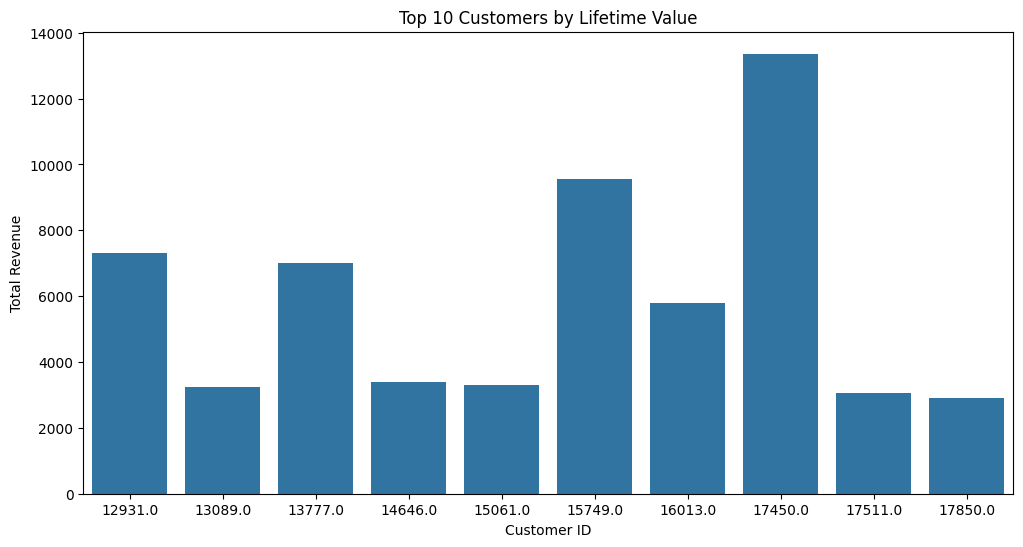

In [51]:
cltv = df.groupby('CustomerID')['TotalRevenue'].sum().reset_index().sort_values(by='TotalRevenue', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='TotalRevenue', data=cltv.head(10), ci=None)
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

